In [1]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
import tensorflow.keras as keras
from tensorflow.keras.layers import BatchNormalization, LayerNormalization
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import Progbar
from tensorflow.python.eager import backprop
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from collections import Counter
from matplotlib import pyplot
import numpy as np
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


# Question 1:

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


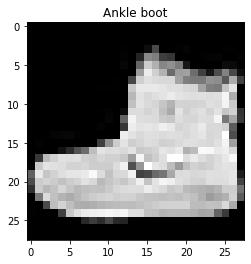

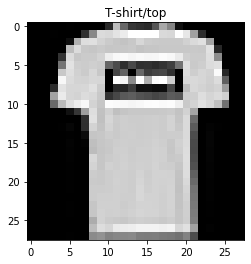

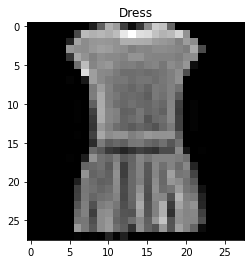

In [2]:
import matplotlib
# load dataset
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in [0,1,3]:
# plot raw pixel data
    plt.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
    if (i==0):
        title = 'Ankle boot'
    elif (i==1):
        title = 'T-shirt/top'
    else : 
        title = 'Dress' 
    plt.title(title)
# show the figure
    plt.show()

In [3]:
y_train[0:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [4]:

print('Train : ' + str(Counter(y_train)))
print('Test : ' + str(Counter(y_test)))

Train : Counter({9: 6000, 0: 6000, 3: 6000, 2: 6000, 7: 6000, 5: 6000, 1: 6000, 6: 6000, 4: 6000, 8: 6000})
Test : Counter({9: 1000, 2: 1000, 1: 1000, 6: 1000, 4: 1000, 5: 1000, 7: 1000, 3: 1000, 8: 1000, 0: 1000})



#### Fashion-MNIST is a dataset of Zalando's article images—consisting with 60,000 training examples and 10,000 test examples. Each example is a 28x28 grayscale image associated to one of the 10 classes.

#### Each image is 28 pixels in height and 28 pixels in width, with a value between 0 and 255. 

#### 0 T-shirt/top : 6000 training examples / 1000 test examples
#### 1 Trouser : 6000 training examples / 1000 test examples
#### 2 Pullover : 6000 training examples / 1000 test examples
#### 3 Dress : 6000 training examples / 1000 test examples
#### 4 Coat : 6000 training examples / 1000 test examples
#### 5 Sandal : 6000 training examples / 1000 test examples
#### 6 Shirt : 6000 training examples / 1000 test examples
#### 7 Sneaker : 6000 training examples / 1000 test examples
#### 8 Bag : 6000 training examples / 1000 test examples
#### 9 Ankle boot : 6000 training examples / 1000 test examples

# Question 2:

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Set numeric type to float32 from uint8
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize value to [0, 1]
x_train /= 255
x_test /= 255

# Transform lables to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Reshape the dataset into 4D array
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

# Define model (LeNet5)

In [6]:
def create_model():
    model = Sequential()

    # C1 Convolutional Layer 'tanh'
    model.add(BatchNormalization(input_shape=(28,28,1)))
    model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding='same'))
    model.add(BatchNormalization())
    # S2 Pooling Layer
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
    model.add(BatchNormalization())
    # C3 Convolutional Layer
    model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
    model.add(BatchNormalization())
    # S4 Pooling Layer
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    model.add(BatchNormalization())
    # C5 Fully Connected Convolutional Layer
    model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
    model.add(BatchNormalization())
    #Flatten the CNN output so that we can connect it with fully connected layers
    model.add(layers.Flatten())

    # FC6 Fully Connected Layer
    model.add(layers.Dense(84, activation='tanh'))
    model.add(BatchNormalization())
    #Output Layer with softmax activation
    model.add(layers.Dense(10, activation='softmax'))
    return model


In [7]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 6)         24        
_________________________________________________________________
average_pooling2d (AveragePo (None, 27, 27, 6)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 27, 27, 6)         24        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 16)        2416      
_________________________________________________________________
batch_normalization_3 (Batch (None, 23, 23, 16)        6

### Train for different learning rate on 5 epochs, batch size = 64

In [55]:
num_epochs = 5
batch_size = 64
hist = []

    
for lr in [10**-i for i in range(-1,10)]:
    print(lr)
    opt = SGD(lr=lr)
    model = create_model()
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])
    hist.append(model.fit(x=x_train,y=y_train, epochs=num_epochs,
                          batch_size=batch_size, validation_data=(x_test, y_test), verbose=1))

10
Epoch 1/5
938/938 [==============================] - 12s 12ms/step - loss: nan - accuracy: 0.1001 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/5
938/938 [==============================] - 11s 12ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/5
938/938 [==============================] - 11s 12ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 4/5
938/938 [==============================] - 11s 12ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 5/5
938/938 [==============================] - 11s 12ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
1
Epoch 1/5
938/938 [==============================] - 11s 12ms/step - loss: 2.3056 - accuracy: 0.1087 - val_loss: 14.3559 - val_accuracy: 0.1000
Epoch 2/5
938/938 [==============================] - 11s 12ms/step - loss: 2.3074 - accuracy: 0.0983 - val_loss: 8.8344 - val_accuracy: 0.1000
Epoch 3/5
938/938 [====

In [56]:
training_loss = []
training_accuracy = []
learning_rates = [10**-i for i in range(-1,10)]
for i in range(len(learning_rates)):
    training_loss.append(hist[i].history['loss'][4])
    training_accuracy.append(hist[i].history['accuracy'][4])

In [57]:
training_loss


[nan,
 2.306472063064575,
 0.2628767192363739,
 0.26983168721199036,
 0.38227328658103943,
 0.5391852259635925,
 0.8886654376983643,
 2.006256341934204,
 2.7867674827575684,
 2.931445837020874,
 3.4312546253204346]

In [58]:
training_accuracy

[0.10000000149011612,
 0.09788333624601364,
 0.902999997138977,
 0.9039666652679443,
 0.8674666881561279,
 0.8144999742507935,
 0.7082499861717224,
 0.33008334040641785,
 0.13615000247955322,
 0.10209999978542328,
 0.05661666765809059]

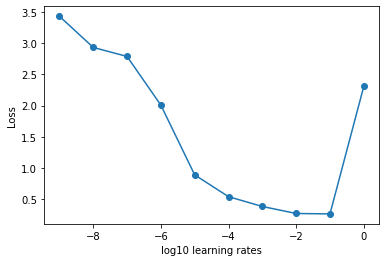

In [59]:
plt.plot(np.log10(learning_rates),training_loss,marker='o')
plt.xlabel('log10 learning rates')
plt.ylabel('Loss')
plt.show()



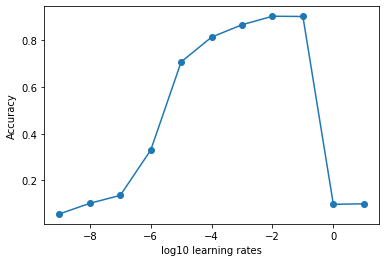

In [60]:
plt.plot(np.log10(learning_rates),training_accuracy,marker='o')
plt.xlabel('log10 learning rates')
plt.ylabel('Accuracy')
plt.show()

### We can identify $lr_{min} =1e-4$ and $lr_{max}=1e-3$

# Question 3:

In [53]:
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K
import numpy as np

class CyclicLR(Callback):
    """This callback implements a cyclical learning rate policy (CLR).
    The method cycles the learning rate between two boundaries with
    some constant frequency, as detailed in this paper (https://arxiv.org/abs/1506.01186).
    The amplitude of the cycle can be scaled on a per-iteration or 
    per-cycle basis.
    This class has three built-in policies, as put forth in the paper.
    "triangular":
        A basic triangular cycle w/ no amplitude scaling.
    "triangular2":
        A basic triangular cycle that scales initial amplitude by half each cycle.
    "exp_range":
        A cycle that scales initial amplitude by gamma**(cycle iterations) at each 
        cycle iteration.
    For more detail, please see paper.
    
    # Example
        ```python
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., mode='triangular')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```
    
    Class also supports custom scaling functions:
        ```python
            clr_fn = lambda x: 0.5*(1+np.sin(x*np.pi/2.))
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., scale_fn=clr_fn,
                                scale_mode='cycle')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```    
    # Arguments
        base_lr: initial learning rate which is the
            lower boundary in the cycle.
        max_lr: upper boundary in the cycle. Functionally,
            it defines the cycle amplitude (max_lr - base_lr).
            The lr at any cycle is the sum of base_lr
            and some scaling of the amplitude; therefore 
            max_lr may not actually be reached depending on
            scaling function.
        step_size: number of training iterations per
            half cycle. Authors suggest setting step_size
            2-8 x training iterations in epoch.
        mode: one of {triangular, triangular2, exp_range}.
            Default 'triangular'.
            Values correspond to policies detailed above.
            If scale_fn is not None, this argument is ignored.
        gamma: constant in 'exp_range' scaling function:
            gamma**(cycle iterations)
        scale_fn: Custom scaling policy defined by a single
            argument lambda function, where 
            0 <= scale_fn(x) <= 1 for all x >= 0.
            mode paramater is ignored 
        scale_mode: {'cycle', 'iterations'}.
            Defines whether scale_fn is evaluated on 
            cycle number or cycle iterations (training
            iterations since start of cycle). Default is 'cycle'.
    """

    def __init__(self, base_lr=0.001, max_lr=0.006, step_size=2000., mode='triangular',
                 gamma=1., scale_fn=None, scale_mode='cycle'):
        super(CyclicLR, self).__init__()

        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.gamma = gamma
        if scale_fn == None:
            if self.mode == 'triangular':
                self.scale_fn = lambda x: 1.
                self.scale_mode = 'cycle'
            elif self.mode == 'triangular2':
                self.scale_fn = lambda x: 1/(2.**(x-1))
                self.scale_mode = 'cycle'
            elif self.mode == 'exp_range':
                self.scale_fn = lambda x: gamma**(x)
                self.scale_mode = 'iterations'
        else:
            self.scale_fn = scale_fn
            self.scale_mode = scale_mode
        self.clr_iterations = 0.
        self.trn_iterations = 0.
        self.history = {}

        self._reset()

    def _reset(self, new_base_lr=None, new_max_lr=None,
               new_step_size=None):
        """Resets cycle iterations.
        Optional boundary/step size adjustment.
        """
        if new_base_lr != None:
            self.base_lr = new_base_lr
        if new_max_lr != None:
            self.max_lr = new_max_lr
        if new_step_size != None:
            self.step_size = new_step_size
        self.clr_iterations = 0.
        
    def clr(self):
        cycle = np.floor(1+self.clr_iterations/(2*self.step_size))
        x = np.abs(self.clr_iterations/self.step_size - 2*cycle + 1)
        if self.scale_mode == 'cycle':
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(cycle)
        else:
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(self.clr_iterations)
        
    def on_train_begin(self, logs={}):
        logs = logs or {}

        if self.clr_iterations == 0:
            K.set_value(self.model.optimizer.lr, self.base_lr)
        else:
            K.set_value(self.model.optimizer.lr, self.clr())        
            
    def on_batch_end(self, epoch, logs=None):
        
        logs = logs or {}
        self.trn_iterations += 1
        self.clr_iterations += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.trn_iterations)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        
        K.set_value(self.model.optimizer.lr, self.clr())


In [54]:
lr_min=1e-4
lr_max=1e-3
clr_triangular = CyclicLR(mode='exp_range', gamma=0.99994,base_lr=lr_min, max_lr=lr_max)

num_epochs = 20
model = create_model()
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=num_epochs,
                          batch_size=batch_size, validation_data=(x_test, y_test), verbose=1,callbacks=[clr_triangular])


Epoch 1/20
938/938 [==============================] - 15s 16ms/step - loss: 0.5103 - accuracy: 0.8198 - val_loss: 0.5144 - val_accuracy: 0.8168
Epoch 2/20
938/938 [==============================] - 15s 16ms/step - loss: 0.4284 - accuracy: 0.8482 - val_loss: 0.4588 - val_accuracy: 0.8415
Epoch 3/20
938/938 [==============================] - 14s 15ms/step - loss: 0.3855 - accuracy: 0.8632 - val_loss: 0.3783 - val_accuracy: 0.8694
Epoch 4/20
938/938 [==============================] - 14s 15ms/step - loss: 0.3175 - accuracy: 0.8865 - val_loss: 0.3321 - val_accuracy: 0.8797
Epoch 5/20
938/938 [==============================] - 14s 15ms/step - loss: 0.2734 - accuracy: 0.9003 - val_loss: 0.3423 - val_accuracy: 0.8772
Epoch 6/20
938/938 [==============================] - 14s 15ms/step - loss: 0.2850 - accuracy: 0.8971 - val_loss: 0.3513 - val_accuracy: 0.8727
Epoch 7/20
938/938 [==============================] - 14s 15ms/step - loss: 0.2941 - accuracy: 0.8952 - val_loss: 0.3308 - val_accuracy:

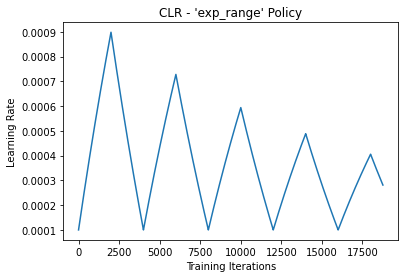

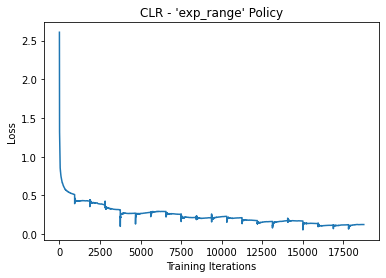

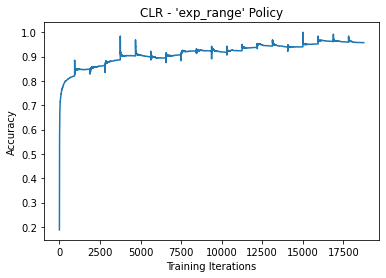

In [21]:

plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("CLR - 'exp_range' Policy")
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])
plt.show()

plt.xlabel('Training Iterations')
plt.ylabel('Loss')
plt.title("CLR - 'exp_range' Policy")
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['loss'])
plt.show()

plt.xlabel('Training Iterations')
plt.ylabel('Accuracy')
plt.title("CLR - 'exp_range' Policy")
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['accuracy'])
plt.show()



### (curiosity) compare performance with our parameters vs with the paper parameters

In [15]:
clr_triangular_paper_param = CyclicLR(mode='exp_range', gamma=0.99994,base_lr=0.001, max_lr=0.006)

num_epochs = 20
model_with_paper_param = create_model()
model_with_paper_param.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model_with_paper_param.fit(x=x_train,y=y_train, epochs=num_epochs,
                          batch_size=batch_size, validation_data=(x_test, y_test),
                           verbose=1,callbacks=[clr_triangular_paper_param])


Epoch 1/20
938/938 [==============================] - 15s 16ms/step - loss: 0.6160 - accuracy: 0.7751 - val_loss: 0.6492 - val_accuracy: 0.7545
Epoch 2/20
938/938 [==============================] - 15s 16ms/step - loss: 0.5516 - accuracy: 0.7997 - val_loss: 0.6809 - val_accuracy: 0.7598
Epoch 3/20
938/938 [==============================] - 15s 16ms/step - loss: 0.5095 - accuracy: 0.8141 - val_loss: 0.4996 - val_accuracy: 0.8188
Epoch 4/20
938/938 [==============================] - 15s 16ms/step - loss: 0.4377 - accuracy: 0.8403 - val_loss: 0.4228 - val_accuracy: 0.8495
Epoch 5/20
938/938 [==============================] - 15s 16ms/step - loss: 0.3890 - accuracy: 0.8575 - val_loss: 0.4547 - val_accuracy: 0.8323
Epoch 6/20
938/938 [==============================] - 15s 16ms/step - loss: 0.4075 - accuracy: 0.8524 - val_loss: 0.4439 - val_accuracy: 0.8380
Epoch 7/20
938/938 [==============================] - 15s 16ms/step - loss: 0.4310 - accuracy: 0.8450 - val_loss: 0.5207 - val_accuracy:

### our parameters works the best for our data even though the paper parameters are also good.

# Question 4:

In [108]:
num_epochs = 5
lr_min = 1e-4
hist = []

batch_size_list = [16*2**i for i in range(10)]    
for bs in [16*2**i for i in range(10)]:
    opt = SGD(lr=lr_min)
    model = create_model()
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])
    hist.append(model.fit(x=x_train,y=y_train, epochs=num_epochs,
                          batch_size=bs, validation_data=(x_test, y_test), verbose=1))

Epoch 1/5
3750/3750 [==============================] - 31s 8ms/step - loss: 0.7698 - accuracy: 0.7373 - val_loss: 0.5907 - val_accuracy: 0.7863
Epoch 2/5
3750/3750 [==============================] - 31s 8ms/step - loss: 0.5756 - accuracy: 0.8025 - val_loss: 0.5294 - val_accuracy: 0.8145
Epoch 3/5
3750/3750 [==============================] - 31s 8ms/step - loss: 0.5277 - accuracy: 0.8203 - val_loss: 0.4980 - val_accuracy: 0.8251
Epoch 4/5
3750/3750 [==============================] - 31s 8ms/step - loss: 0.4985 - accuracy: 0.8300 - val_loss: 0.4785 - val_accuracy: 0.8322
Epoch 5/5
3750/3750 [==============================] - 31s 8ms/step - loss: 0.4796 - accuracy: 0.8361 - val_loss: 0.4642 - val_accuracy: 0.8370
Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.8720 - accuracy: 0.7034 - val_loss: 0.6451 - val_accuracy: 0.7728
Epoch 2/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.6043 - accuracy: 0.7914 - val_loss: 0.5755 - val_accuracy:

In [109]:
training_loss = []
training_accuracy = []
batch_size_list = [16*2**i for i in range(10)]
for i in range(len(batch_size_list)):
    training_loss.append(hist[i].history['loss'][4])
    training_accuracy.append(hist[i].history['accuracy'][4])

In [110]:
training_loss


[0.47962191700935364,
 0.5027687549591064,
 0.5453821420669556,
 0.6236060261726379,
 0.7042196393013,
 0.8025332689285278,
 0.9304342269897461,
 1.2008851766586304,
 1.7183446884155273,
 2.113232374191284]

In [111]:
training_accuracy

[0.8360666632652283,
 0.8276833295822144,
 0.8158666491508484,
 0.7914333343505859,
 0.7651000022888184,
 0.73580002784729,
 0.687250018119812,
 0.59375,
 0.4340499937534332,
 0.25609999895095825]

In [112]:
plt.plot(np.log2(batch_size_list),training_loss,marker='o')
plt.xlabel('log2 batch size')
plt.ylabel('Loss')
plt.show()



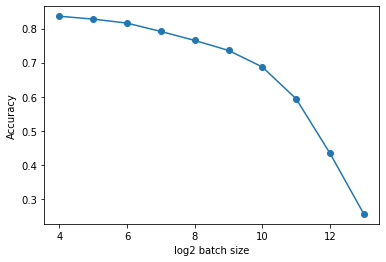

In [113]:
plt.plot(np.log2(batch_size_list),training_accuracy,marker='o')
plt.xlabel('log2 batch size')
plt.ylabel('Accuracy')
plt.show()

### We clearly observe that the accuracy and the loss decrease as a function of batch size

# Other way using effective batch size explained in class.

In [8]:
def effective_batchsize(model, x_train, y_train, x_test, y_test, batch_size, batch_cycle_length, num_epochs,
                    lr=1e-4,momentum=0.9):
    
    def gradient_accumulations(acc_grad, steps_grad):
    ## "gradients": the accumulated gradients
    ## "step_gradients" : gradients computed in this step

        if acc_grad is None:
            acc_grad = steps_grad
        else:
            for iter, step_g in enumerate(steps_grad):
                acc_grad[iter] += step_g
        return (acc_grad)
    
    opt= SGD(lr,momentum)
    
    
    ## We start with bmin=batch_size and go in a cycling manner by epochs to bmax=batch_size*batch_cycle_length.
    ## We increase the mini batch by multiplying. it by all the integers 1 to batch_size_length.
    ## We basically get gradients every mini batch but 
    ## performs the update only after target_batch_size_now/bmin iterations

    

    # convert to tf object and generate bmin mini batch to train from bmin batch size
    training = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    # the trick is to use bmin for batch size so we have flexibility to increase
    training = training.shuffle(buffer_size=1000).batch(batch_size)   
    
    # initialise model 
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])
    
    cross_entropy_loss = tf.keras.losses.CategoricalCrossentropy()

    
    
    train_loss_by_epochs = []
    train_accuracy_by_epochs = []
    val_loss_by_epochs = []
    val_accuracy_by_epochs = []


    for epoch in range(num_epochs):
        ## Progress Bar
        pb_i = Progbar(len(x_train) // batch_size + 1, verbose=1)
        ##

        # Initialization
        model.reset_metrics() # the metrics returned will be only for this batch
        acc_grad = None
        update_counter = 0
        train_logs = {}

        # Start the current epoch
        for _, (x_mini_batch_train, y_mini_batch_train) in enumerate(training):
            # number of mini batches=bmin in one epoch (here bmax=bmin*batch_cycle_length)

            with backprop.GradientTape()  as tape:

                # get prediction for this mini batch
                yhat = model(x_mini_batch_train, training=True) 

                # Compute the loss value for this minibatch.
                mini_batch_loss_value = cross_entropy_loss(y_mini_batch_train, yhat) / batch_cycle_length

            # gradients
            steps_grad = tape.gradient(mini_batch_loss_value, model.trainable_variables)
            
            # use function for gradient accumulation
            acc_grad = gradient_accumulations(acc_grad, 
                                                  steps_grad)
            # Update when length is reached
            if (update_counter == 0):        # batch_cycle_length of gradients accumulated   
                # we update at targeted batch  size after training(capped by bmin *cycle length and cycles
                # using bmin * (1 to batch  multiplier ) to implement cycle and update at every value of the cycle) 
                opt.apply_gradients(zip(acc_grad, model.trainable_variables))
                acc_grad = None
                update_counter = batch_cycle_length

            # update metrics
            model.compiled_metrics.update_state(y_mini_batch_train, yhat)
            train_logs = {m.name : float(m.result()) for m in model.metrics}
            
            #display verbose
            pb_i.add(1, values=[('loss', mini_batch_loss_value*batch_cycle_length), ('acc', train_logs['accuracy'])])

            # update counter before update
            update_counter -= 1

        ## Log result of current epoch
        # Average training and accuracy loss by epoch
        train_loss_by_epochs.append(float(mini_batch_loss_value) * batch_cycle_length)
        train_accuracy_by_epochs.append(train_logs['accuracy'])

        # Validation                
        val_logs = model.evaluate(x_test, y_test, 
                                    batch_size=16,
                                  steps=10, 
                                  return_dict=True, 
                                  verbose=0)
        val_logs = {'validation_' + name: val for name, val in val_logs.items()}


        # Log validation results
        val_loss_by_epochs.append(val_logs['validation_loss'])
        val_accuracy_by_epochs.append(val_logs['validation_accuracy'])
            
    print("mini-batches gradient updates varying from size : bmin = "+str(batch_size)+
          " to bmax = " + str(batch_size*batch_cycle_length))   
    return {'train_loss': train_loss_by_epochs,'train_accuracy': train_accuracy_by_epochs, 
            'validation_loss': val_loss_by_epochs,'validation_accuracy': val_accuracy_by_epochs}

In [10]:
lr_min = 1e-4
model = create_model()    
history_metrics = effective_batchsize(model, 
x_train=x_train, y_train=y_train, 
x_test=x_test, y_test=y_test, 
batch_size=256, 
batch_cycle_length=16, 
num_epochs=20,lr=1e-4)

235/235 [==============================] - 11s 46ms/step - loss: 0.5836 - acc: 0.8011 1s - loss: 0
mini-batches gradient updates varying from size : bmin = 256 to bmax = 4096


In [11]:
history_metrics

{'train_loss': [1.3469253778457642,
  1.0371612310409546,
  0.8850236535072327,
  0.7619113922119141,
  0.6883540749549866,
  0.6805928349494934,
  0.7656068801879883,
  0.5705147981643677,
  0.7585275173187256,
  0.6981126666069031,
  0.6773139834403992,
  0.579261839389801,
  0.6500706076622009,
  0.561093270778656,
  0.6294794678688049,
  0.6367425918579102,
  0.7235509753227234,
  0.6274170279502869,
  0.4145136773586273,
  0.5649299621582031],
 'train_accuracy': [0.29883334040641785,
  0.6182166934013367,
  0.6876999735832214,
  0.7133333086967468,
  0.7279999852180481,
  0.7390166521072388,
  0.7466833591461182,
  0.753333330154419,
  0.7592333555221558,
  0.7651166915893555,
  0.7701666951179504,
  0.7743499875068665,
  0.777649998664856,
  0.7809333205223083,
  0.7847833037376404,
  0.788349986076355,
  0.7918000221252441,
  0.7949333190917969,
  0.7964166402816772,
  0.7986833453178406],
 'validation_loss': [1.400050163269043,
  0.9917440414428711,
  0.8770163655281067,
  0.82

# Question 5: 

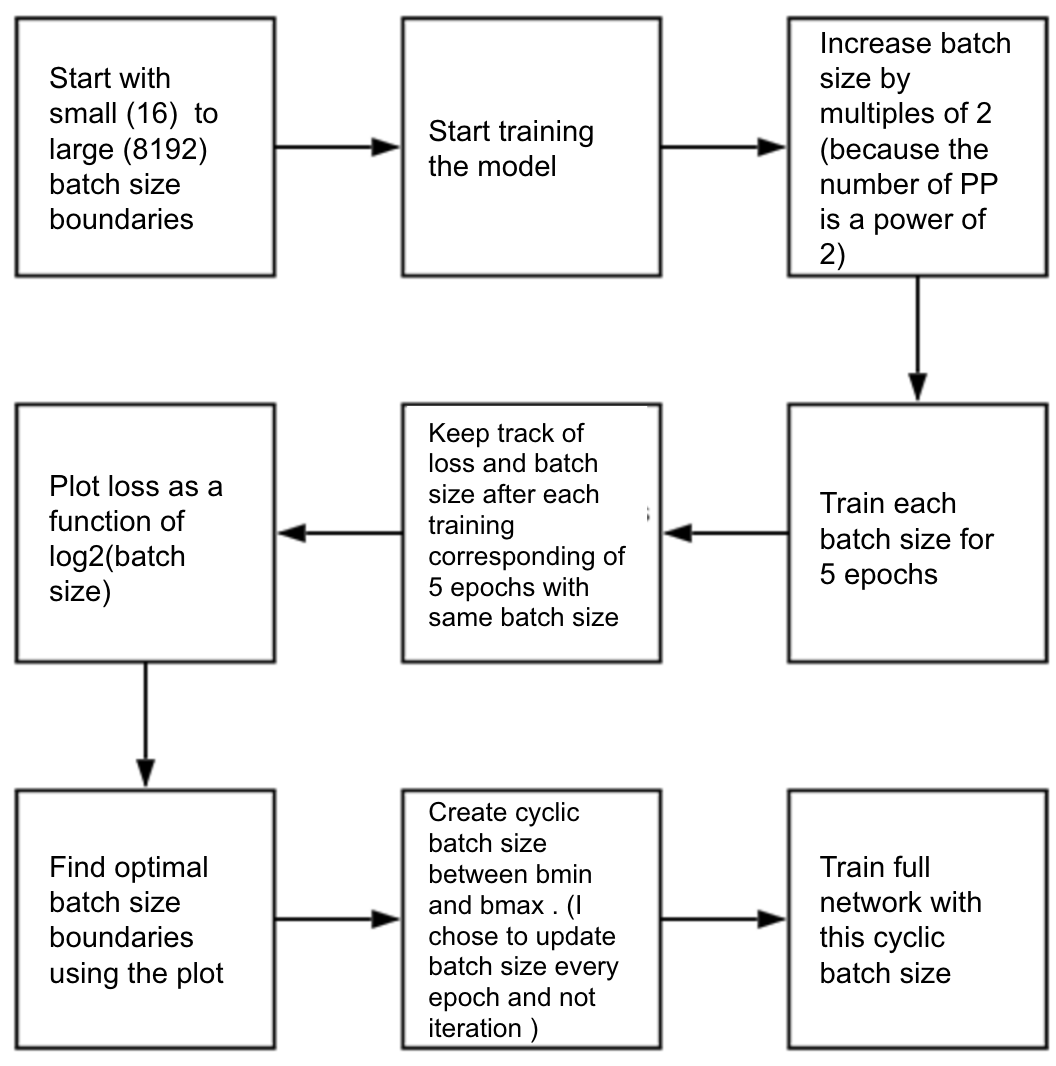

In [15]:
from PIL import Image, ImageDraw
Image.open('batch_size_process.png')

# Algorithm for automatic detection of bmin and bmax

In [27]:

threshold_decrease = 3.5 ## arbitrary (the user can change the threshold percentage decrease)
training_accuracy = [0.8360666632652283,0.8276833295822144,0.8158666491508484,0.7914333343505859,
                     0.7651000022888184,0.73580002784729,0.687250018119812,0.59375,
                     0.4340499937534332,0.25609999895095825]
batch_size_list = [16*2**i for i in range(10)]
def detect_bmin_bmax (training_accuracy,threshold_decrease,batch_size_list):
    list_decrease = [(100.0 * (a1-a2) / a1) >-threshold_decrease  for a1, a2 in zip(training_accuracy[1:], training_accuracy)]
    candidates = [i for i, x in enumerate(list_decrease) if x]
    if (len(candidates)<1):
        print("Increase list batch size and | or increase threshold of decreased accuracy")
    else :
        bmin = 16*2**candidates[0]
        bmax = 16*2**(max(candidates)+1)
    return (bmin,bmax)

In [28]:
bmin,bmax = detect_bmin_bmax (training_accuracy,threshold_decrease,batch_size_list)
print('bmin :' + str(bmin))
print('bmax :' + str(bmax))

bmin :16
bmax :256


In [105]:
bmin=16
bmax=256


# Question 6: 

### We  start at a small batch size( faster training dynamics) then we grow the batch size so an exponential increase is better . Again, here. we change the batch size using multiple of 2 ( the number of physical processor is a power of 2 , therefore we should use virtual processors as a power of 2 also. We change in a cyclic manner as explained above. the cyclic batch size every epoch . 

### For me , there is limitation by doing so because learning rate is fixed while we change batch size . My feeling is that both batch. size and learning rate should be adapted in a. cyclic manner since we usually want large learning rates for large batch sizes because we are confident of our gradient computations while smaller learning rates when the batch size is small since there is more noise and therefore we trust less our gradient computations . Both cycles are interesting and we should take the best of both worlds.

In [107]:
batch_sizes_schedule=[]
for i in range(int(np.log2(bmax/bmin))+1):
    batch_sizes_schedule.append(bmin*2**i )

model = create_model()
opt = SGD(0.01)
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],optimizer=opt)
for i in range(20):
    print(batch_sizes_schedule[i%len(batch_sizes_schedule)])
    model.fit(x=x_train,y=y_train, epochs=1, validation_data=(x_test, y_test), verbose=1,
          batch_size=batch_sizes_schedule[i%3])


16
3750/3750 [==============================] - 31s 8ms/step - loss: 0.4954 - accuracy: 0.8255 - val_loss: 0.4003 - val_accuracy: 0.8550
32
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3328 - accuracy: 0.8817 - val_loss: 0.3669 - val_accuracy: 0.8659
64
938/938 [==============================] - 11s 12ms/step - loss: 0.2775 - accuracy: 0.9012 - val_loss: 0.3157 - val_accuracy: 0.8867
128
3750/3750 [==============================] - 31s 8ms/step - loss: 0.3278 - accuracy: 0.8836 - val_loss: 0.3473 - val_accuracy: 0.8771
256
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2544 - accuracy: 0.9083 - val_loss: 0.2960 - val_accuracy: 0.8941
16
938/938 [==============================] - 11s 12ms/step - loss: 0.2101 - accuracy: 0.9255 - val_loss: 0.2855 - val_accuracy: 0.9000
32
3750/3750 [==============================] - 31s 8ms/step - loss: 0.2737 - accuracy: 0.9019 - val_loss: 0.3162 - val_accuracy: 0.8861
64
1875/1875 [=========================

# Question 7:

### It seems that the accuracy is better when we perform cycling policy of the batch size (0.911) and it converges faster because it allows the benefit from low batch size (quick convergence, safer and better local approximation) as well as large batch size  (more confidence in gradient estimation butleads to poor generalization) in a cycling manner.

### it is advised to start at a small batch size( faster training dynamics) then we grow the batch size through (guaranteed convergence)

There is this beautiful paper that explain some batch size concepts very nicely :DON’T DECAY THE LEARNING RATE,
INCREASE THE BATCH SIZE
https://arxiv.org/pdf/1711.00489.pdf